# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + 'appid=' + weather_api_key + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind =  city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | linjiang
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | thompson
Processing Record 11 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 12 of Set 1 | dikson
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | mega
Processing Record 15 of Set 1 | vardo
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | deputatskiy
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | nikolskoye
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | caravelas
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,18.85,74,17,4.67,NZ,1675127029
1,ushuaia,-54.8000,-68.3000,5.03,87,92,1.55,AR,1675127020
2,aklavik,68.2191,-135.0107,-34.68,100,22,0.78,CA,1675127140
3,punta arenas,-53.1500,-70.9167,10.62,50,83,7.52,CL,1675126962
4,vanimo,-2.6741,141.3028,28.53,77,62,2.40,PG,1675127141


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("../WeatherPy/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("../WeatherPy//cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,18.85,74,17,4.67,NZ,1675127029
1,ushuaia,-54.8000,-68.3000,5.03,87,92,1.55,AR,1675127020
2,aklavik,68.2191,-135.0107,-34.68,100,22,0.78,CA,1675127140
3,punta arenas,-53.1500,-70.9167,10.62,50,83,7.52,CL,1675126962
4,vanimo,-2.6741,141.3028,28.53,77,62,2.40,PG,1675127141


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

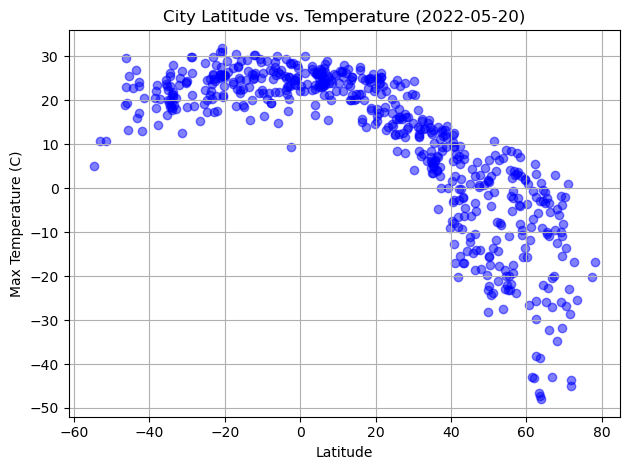

In [47]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Temperature (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.tight_layout()


# Save the figure
plt.savefig("../WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

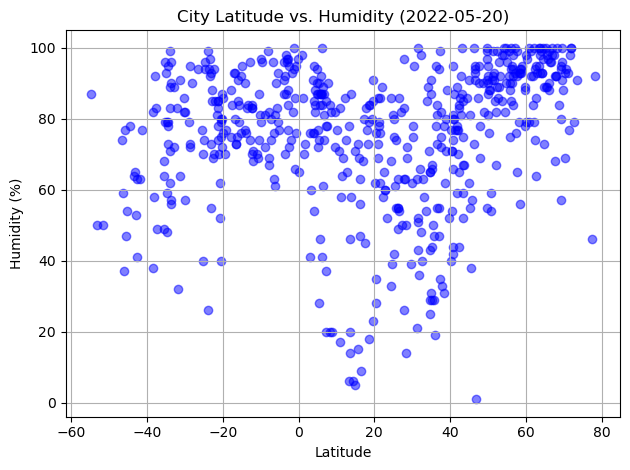

In [48]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Humidity (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

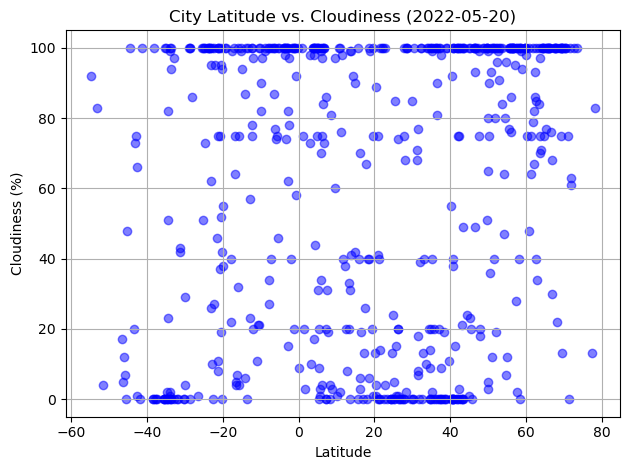

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Cloudiness (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

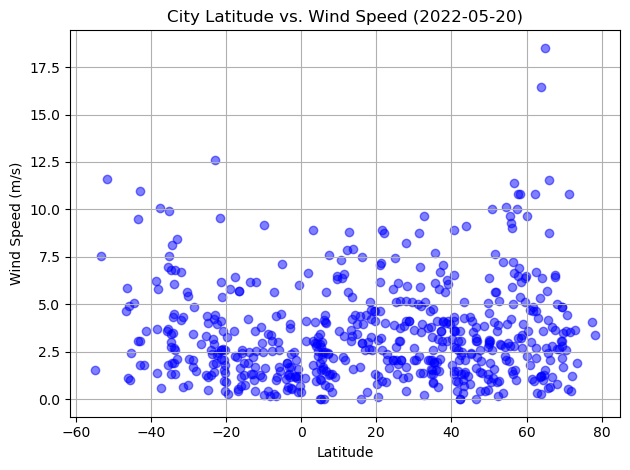

In [50]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'],alpha=0.5,marker='o',color='blue')

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Wind Speed (2022-05-20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.tight_layout()

# Save the figure
plt.savefig("../WeatherPy//Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [51]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,aklavik,68.2191,-135.0107,-34.68,100,22,0.78,CA,1675127140
6,linjiang,41.8069,126.9078,-8.77,89,100,0.93,CN,1675127142
7,hamilton,39.1834,-84.5333,-0.07,88,100,4.12,US,1675127053
8,thompson,55.7435,-97.8558,-23.16,90,100,4.23,CA,1675127142
9,dikson,73.5069,80.5464,-25.35,91,100,1.93,RU,1675127143


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,18.85,74,17,4.67,NZ,1675127029
1,ushuaia,-54.8000,-68.3000,5.03,87,92,1.55,AR,1675127020
3,punta arenas,-53.1500,-70.9167,10.62,50,83,7.52,CL,1675126962
4,vanimo,-2.6741,141.3028,28.53,77,62,2.40,PG,1675127141
5,port alfred,-33.5906,26.8910,18.99,96,94,1.34,ZA,1675127141


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.708673910736958


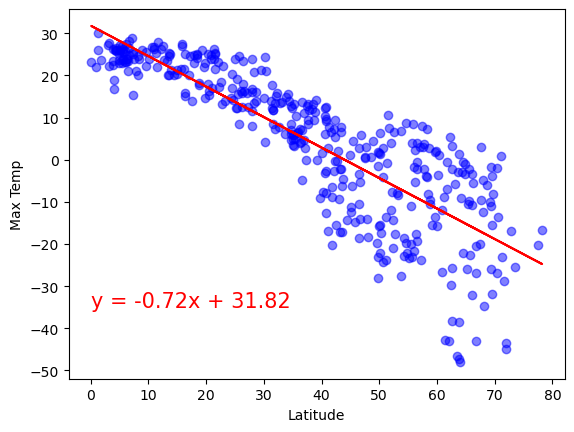

In [53]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {r_value**2}")


The r-squared is: 0.142163121498584


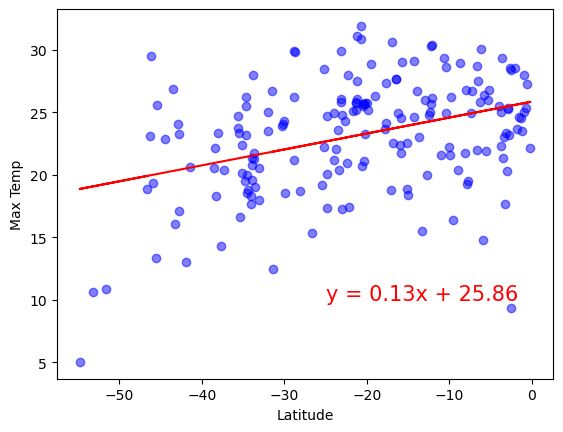

In [54]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.16080472190624806


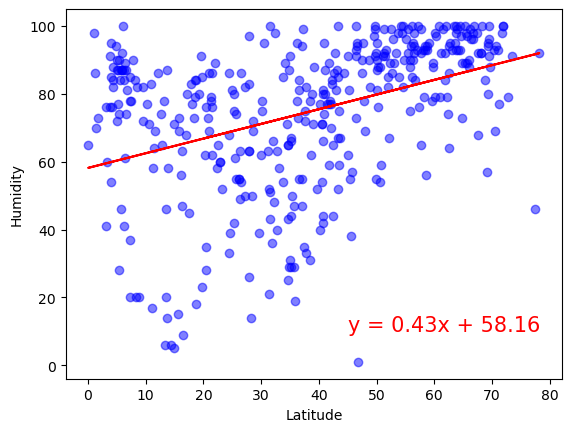

In [55]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.1659310728483959


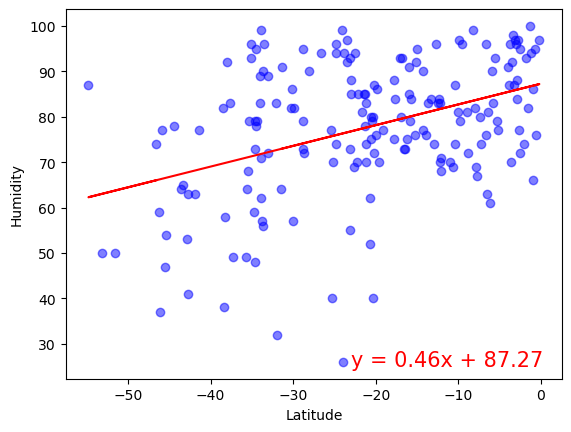

In [56]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.09348637121373506


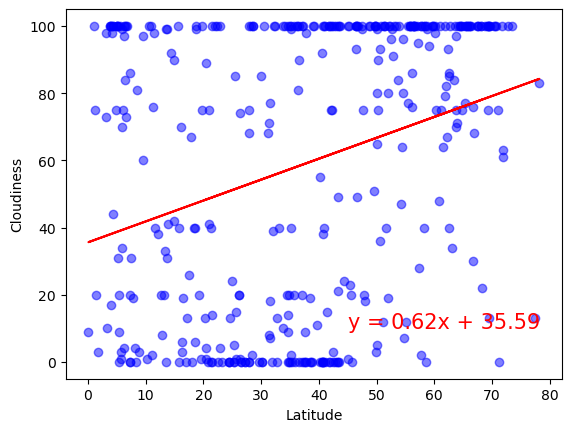

In [57]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.16376546208762324


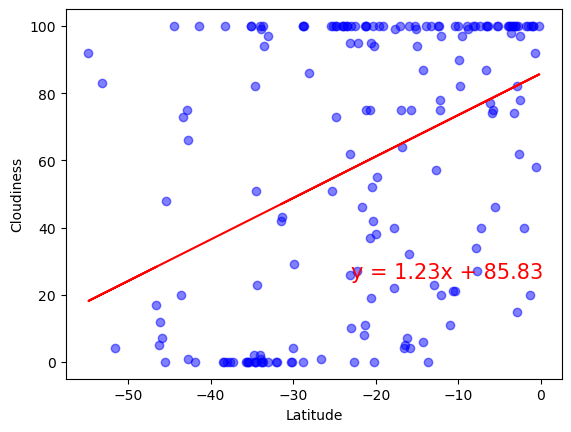

In [58]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-23,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013214207778538536


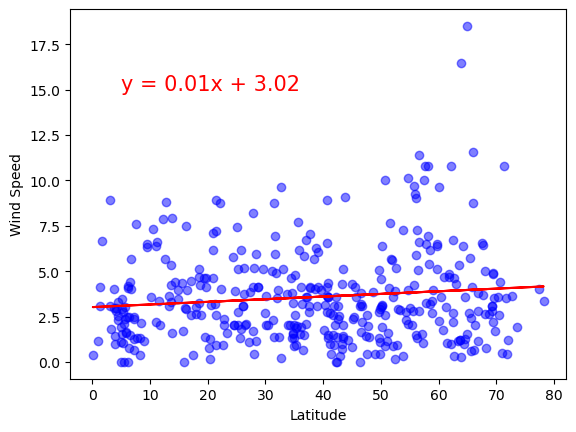

In [59]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
regress_values = northern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {r_value**2}")

The r-squared is: 0.13952167529953508


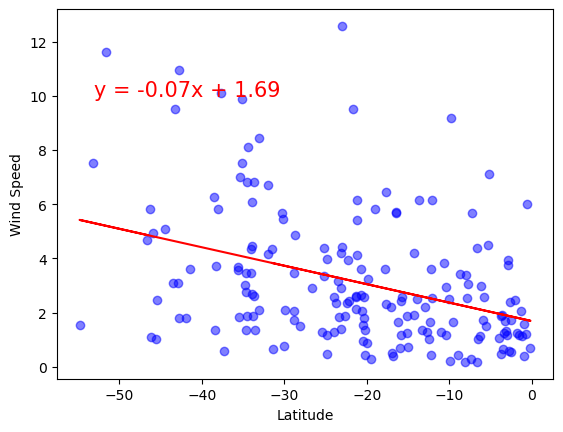

In [60]:
#Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
regress_values = southern_hemi_df['Lat'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',alpha=0.5,color='blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {r_value**2}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE